# Tarea 1, Grupo 9
## Integrantes:
- Pablo Alarcón Olave
- Nombre 2
- Nombre 3

# Ejercicio 1. Exploración del set de datos 

Atributos:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude

Número de observaciones: 20640


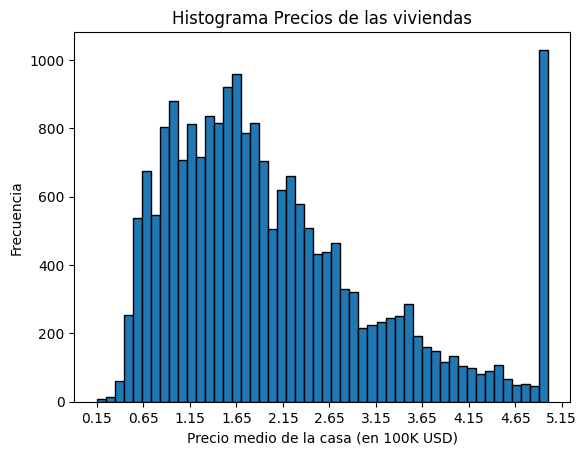

       MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
19802  0.5360      36.0  12.250000   3.500000        18.0  2.250000     40.31   
2521   1.6607      16.0   6.710526   1.921053        85.0  2.236842     39.71   
2799   2.1000      19.0   3.774390   1.457317       490.0  2.987805     36.40   
9188   4.1932      52.0   3.568889   1.186667       628.0  2.791111     34.24   
5887   2.3667      39.0   3.572464   1.217391       259.0  1.876812     34.15   

       Longitude  MedHouseVal  
19802    -123.17      0.14999  
2521     -122.74      0.14999  
2799     -117.02      0.14999  
9188     -117.86      0.14999  
5887     -118.33      0.17500  


In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carga del set de datos
housing = fetch_california_housing(as_frame=False)
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Mostrar nombres de atributos
print("Atributos:")
for i, name in enumerate(feature_names, start=1):
    print(f"{i}. {name}")
#Número de observaciones (samples, muestras)
print("\nNúmero de observaciones:", X.shape[0])

#Histograma
plt.hist(y, bins=50, edgecolor="black")
# Configurar ticks en el eje X
min_val, max_val = y.min(), y.max()
step = 0.5  # subdivisiones cada 0.5 (50 mil USD)
plt.xticks(np.arange(min_val, max_val + step, step))

plt.xlabel("Precio medio de la casa (en 100K USD)")
plt.ylabel("Frecuencia")
plt.title("Histograma Precios de las viviendas")
plt.show()

#TABLA DE LOS DATOS (extra)
df = pd.DataFrame(X, columns=feature_names)
df["MedHouseVal"] = y
df_ordenado = df.sort_values(by="MedHouseVal", ascending=True) #Ordera
print(df_ordenado.head()) #Ajustable según los datos que se requieran revisar. 

# Ejercicio 2. Modelo lineal

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

#entrenamiento del modelo
regre = LinearRegression()
regre.fit(X_train, y_train)
y_train_predict = regre.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print('El error de entrenamiento es MSE = ', mse_train)

#test del modelo
y_test_predict = regre.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)
print('El error de test es MSE = ', mse_test)

El error de entrenamiento es MSE =  0.5145924626720385
El error de test es MSE =  0.5435945247974563


# Ejercicio 3. Coeficiente de determinación

In [3]:
from sklearn.metrics import r2_score

#Para los datos de entrenamiento
R2_train = r2_score(y_train, y_train_predict) 
print('El coeficiente de determinación en entrenamiento es = ', R2_train)

#Para los datos de test
R2_test = r2_score(y_test, y_test_predict) 
print('El coeficiente de determinación en test es = ', R2_test)



El coeficiente de determinación en entrenamiento es =  0.612130026035787
El coeficiente de determinación en test es =  0.5939400468776985



#
Los valores obtenidos para el coeficiente de determinación "R2" no son pésimos, pero tampoco son excelentes a simple vista, en consecuencia se podría estimar que el funcionamiento del modelo está siendo regular. Tanto en entrenamiento como en test se obtiene un R2 aproximado de 0.6, esto significa que el modelo logra predecir en un 60% la variabilidad del precio respecto a los atributos, el 40% respectivo puede deberse a que: 
#
1) Los atributos no tienen una relación completamente lineal y la regresión lineal sólo puede ajustar planos rectos en el dominio de estudio.
2) El modelo está subajustado, por lo tanto se debiese usar otro tipo de modelo u hiperparámetros para esta base de datos.
3) Los datos de los atributos deben tener una alta variación, lo que hace que el modelo lineal utilizado no se ajuste correctamente.

# Ejercicio 4. Cambio en la variable objetivo

In [4]:
X_train, X_test, y2_train, y2_test = train_test_split(X, 2*y, test_size=0.4, random_state=42) 

regre = LinearRegression()
regre.fit(X_train, y2_train)
y2_train_predict = regre.predict(X_train)
y2_test_predict = regre.predict(X_test)

mse_train = mean_squared_error(y2_train, y2_train_predict)
print('El error de entrenamiento es MSE = ', mse_train) 

mse_test = mean_squared_error(y2_test, y2_test_predict)
print('El error de test es MSE = ', mse_test)

R2_train = r2_score(y2_train, y2_train_predict) 
print('El coeficiente de determinación en entrenamiento es = ', R2_train)

R2_test = r2_score(y2_test, y2_test_predict) 
print('El coeficiente de determinación en test es = ', R2_test)


El error de entrenamiento es MSE =  2.058369850688154
El error de test es MSE =  2.174378099189825
El coeficiente de determinación en entrenamiento es =  0.612130026035787
El coeficiente de determinación en test es =  0.5939400468776985


Como se observa, el error cuadrático medio (MSE) aumenta 4 veces si el precio de las viviendas aumenta al doble, mientras que el R2 se mantiene igual debido a que por la forma de la ecuación que lo describe (una relación) este es invariante a cambios de escala. 

# Ejercicio 5. Mejor atributo en modelo lineal

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Cargar datos en arrays de NumPy
housing = fetch_california_housing(as_frame=False)
X, y = housing.data, housing.target
feature_names = housing.feature_names

mse_results = []
r2_results = []

for i, name in enumerate(feature_names):
    # 1. Seleccionar una sola columna (atributo i)
    Xi = X[:, i]
    Xi = np.reshape(Xi, (len(Xi), 1))  # reshape para que sea 2D
    
    # 2. Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        Xi, y, train_size=0.6, random_state=42
    )
    
    # 3. Entrenar modelo lineal simple
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # 4. Predicciones y métricas
    y_test_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    mse_results.append((name, mse))
    r2_results.append((name, r2))

# Ordenar por MSE (de menor a mayor)
mse_results = sorted(mse_results, key=lambda x: x[1])
r2_results = sorted(r2_results, key=lambda x: x[1], reverse=True)

print("Mejor atributo según MSE de test:")
print(f"Atributo: {mse_results[0][0]}, MSE test = {mse_results[0][1]:.4f}")

print("\nRanking de R² en test:")
for name, r2 in r2_results:
    print(f"{name}: R² = {r2:.4f}")

Mejor atributo según MSE de test:
Atributo: MedInc, MSE test = 0.7087

Ranking de R² en test:
MedInc: R² = 0.4706
AveRooms: R² = 0.0228
Latitude: R² = 0.0215
HouseAge: R² = 0.0112
AveBedrms: R² = 0.0019
Longitude: R² = 0.0015
AveOccup: R² = 0.0005
Population: R² = 0.0004


# Ejercicio 6. Visualización

Mejor atributo: MedInc (col 0) | MSE test = 0.7087


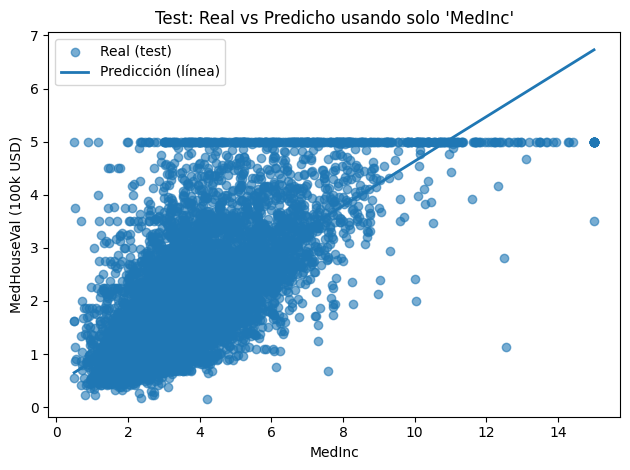


Ranking por MSE de test (mejor → peor):
MedInc      MSE=0.7087
AveRooms    MSE=1.3081
Latitude    MSE=1.3100
HouseAge    MSE=1.3238
AveBedrms   MSE=1.3362
Longitude   MSE=1.3367
AveOccup    MSE=1.3380
Population  MSE=1.3381


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar datos (precios originales)
housing = fetch_california_housing(as_frame=False)
X, y = housing.data, housing.target
feature_names = housing.feature_names  # ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

# 2) Buscar el mejor atributo individual por MSE de test
mse_by_feat = []
for i, name in enumerate(feature_names):
    Xi = X[:, i].reshape(len(X), 1)          # (n,1)
    Xtr, Xte, ytr, yte = train_test_split(Xi, y, train_size=0.6, random_state=42)
    reg = LinearRegression().fit(Xtr, ytr)
    yte_pred = reg.predict(Xte)
    mse = mean_squared_error(yte, yte_pred)
    mse_by_feat.append((i, name, mse))

# Ordenar de menor (mejor) a mayor MSE
mse_by_feat.sort(key=lambda t: t[2])
best_idx, best_name, best_mse = mse_by_feat[0]
print(f"Mejor atributo: {best_name} (col {best_idx}) | MSE test = {best_mse:.4f}")

# 3) Reentrenar con el mejor atributo y preparar datos de test para graficar
Xi = X[:, best_idx].reshape(len(X), 1)
X_train, X_test, y_train, y_test = train_test_split(Xi, y, train_size=0.6, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

# 4) Ordenar por el atributo en test para trazar una línea suave
order = np.argsort(X_test.ravel())
X_test_sorted = X_test.ravel()[order]
y_pred_sorted = y_test_pred[order]

# 5) Gráfico: puntos reales y línea de predicción
plt.figure()
plt.scatter(X_test.ravel(), y_test, label="Real (test)", alpha=0.6)
plt.plot(X_test_sorted, y_pred_sorted, label="Predicción (línea)", linewidth=2)
plt.xlabel(best_name)
plt.ylabel("MedHouseVal (100k USD)")
plt.title(f"Test: Real vs Predicho usando solo '{best_name}'")
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Mostrar ranking rápido
print("\nRanking por MSE de test (mejor → peor):")
for i, name, mse in mse_by_feat[:8]:
    print(f"{name:10s}  MSE={mse:.4f}")